In [1]:
import requests

r_train = requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a")# 获取数据集
r_val=requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a.t")# 获取数据集

In [2]:
from io import BytesIO
from sklearn.datasets import load_svmlight_file

n_features=123

X_train, y_train = load_svmlight_file(BytesIO(r_train.content), n_features)# 读取实验数据
X_train = X_train.toarray()# 转换成arry

X_val, y_val = load_svmlight_file(BytesIO(r_val.content), n_features)# 读取实验数据
X_val = X_val.toarray()# 转换成arry

In [3]:
import numpy

n_train_samples, n_train_features = X_train.shape# 计算有多少个samples和feature
X_train = numpy.column_stack((X_train, numpy.ones((n_train_samples, 1))))# 再加上一列
y_train = y_train.reshape((-1, 1))# 将y转置，换成一列的
n_val_samples, n_val_features = X_val.shape# 计算有多少个samples和feature
X_val = numpy.column_stack((X_val, numpy.ones((n_val_samples, 1))))# 再加上一列
y_val = y_val.reshape((-1, 1))# 将y转置，换成一列的

#将结果变为1和0
for i in range(y_train.shape[0]):
    y_train[i][0]=(y_train[i][0]+1)/2

for i in range(y_val.shape[0]):
    y_val[i][0]=(y_val[i][0]+1)/2
    
# print(X_train)
# print(y_train)
# print(X_val)
# print(y_val)

In [4]:
learning_rate = 0.003
max_epoch = 800
batch_size=500
C=0.5

losses_train = []
losses_val = []

In [5]:
# 不同的初始化参数的方式# 产生的w为n_features+1行，1列的列向量
#w = numpy.zeros((n_features + 1, 1))  # initialize with zeros
w = numpy.random.random((n_features + 1, 1))  # initialize with random numbers
# w = numpy.random.normal(1, 1, size=(n_features + 1, 1))  # initialize with zero normal distribution
# print(w)

In [6]:
#随机产生batch的函数
def sample(X, y, batch_size):
    batch=random.sample(range(0,n_train_samples),batch_size) 
    random_row = numpy.random.randint(len(y) - batch_size)
    
    # get partial sample
    X_batch = X[batch[0]]
    y_batch = y[batch[0]]
    random_row += 1
    for i in range(batch_size - 1):
        X_batch = numpy.vstack((X_batch,X[batch[i]]))
        y_batch = numpy.vstack((y_batch,y[batch[i]]))
    
    return X_batch, y_batch

In [9]:
import random


for epoch in range(max_epoch):
    X_batch, y_batch = sample(X_train, y_train, batch_size)# 取batch
    temp=1-y_batch*numpy.dot(X_batch,w)
    st=numpy.where(temp>0,y_batch,0)#判断
    w-=learning_rate*(w-C*numpy.dot(X_batch.transpose(),st))#下降
    
    # 计算测试集的loss
    temp_val = 1-y_val*numpy.dot(X_val,w)
    st_val=numpy.where(temp_val>0,temp_val,0)
    loss_val=(numpy.sum(w*w)/2+C*numpy.sum(st_val))/n_val_samples
    losses_val.append(loss_val)
    
print("losses_val:\n",losses_val)

losses_val:
 [0.3832610219455611, 0.3832527893532455, 0.3832446060823906, 0.3832364718375113, 0.38322838632489303, 0.3832203492525809, 0.38321236033036904, 0.3832044192697901, 0.3831965257841051, 0.38318867958829284, 0.38318088039903964, 0.38317312793472935, 0.3831654219154327, 0.38315776206289764, 0.38315014810053916, 0.38314257975342914, 0.38313505674828663, 0.383127578813468, 0.3831201456789568, 0.38311275707635445, 0.38310541273887033, 0.3830981124013121, 0.3830908558000761, 0.38308364267313816, 0.3830764727600437, 0.38306934580189855, 0.3830622615413597, 0.38305521972262574, 0.3830482200914278, 0.38304126239502034, 0.3830343463821721, 0.3830274718031568, 0.38302063840974443, 0.383013845955192, 0.38300709419423473, 0.38300038288307736, 0.3829937117793852, 0.38298708064227516, 0.3829804892323076, 0.38297393731147716, 0.3829674246432044, 0.3829609509923273, 0.38295451612509257, 0.38294811980914745, 0.3829417618135312, 0.3829354419086666, 0.3829291598663521, 0.38292291545975304, 0.382

Text(0.5,1,'The graph of absolute diff value varing with the number of iterations')

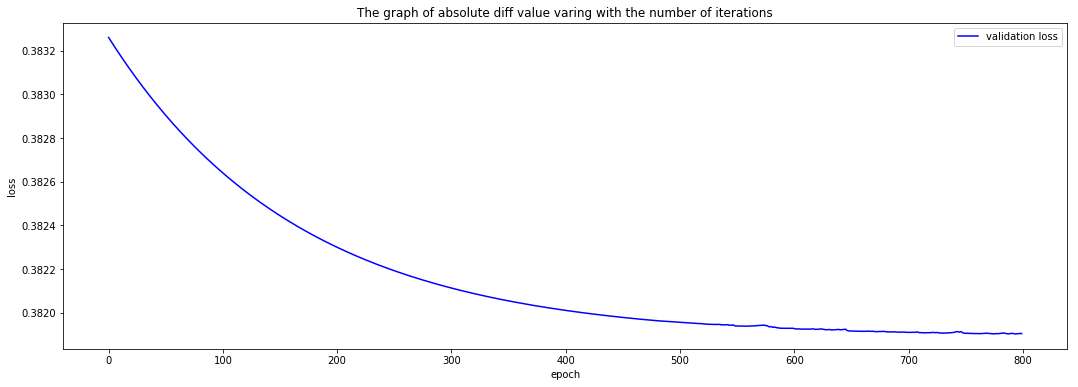

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

plt.plot(losses_val, "-", color="b", label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("The graph of absolute diff value varing with the number of iterations")